# Initial Look At the Data

We can download data for a particular police authroity from the `data.police.uk` website.

https://data.police.uk/data/

For example, download the data for the Nottinghamshire area for the December 2018 to December 2018 period (i.e. just for December 2018).

From the [homepage](../) of this notebook environment, click on the `Upload` button and upload the zip file you have just downloaded from the data.police.uk website.

In [1]:
#List the files in the current directory - you should see the zip file you uploaded
!ls

 ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip   LICENSE
 binder					        README.md
'Initial Look At The Data.ipynb'


In [2]:
#Unzip the zip file
#It should unzip a CSV file into a newly created folder
#My file was called ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip so that's what I'm using
#If your file is called myfile.zip, then a good bet would be: !unzip myfile.zip
!unzip ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip

Archive:  ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip
  inflating: 2018-12/2018-12-nottinghamshire-street.csv  


In [3]:
#Look to check the folder is there...
!ls

 2018-12				       'Initial Look At The Data.ipynb'
 ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip   LICENSE
 binder					        README.md


In [4]:
#Look inside the folder
!ls 2018-12

2018-12-nottinghamshire-street.csv


## Preview the Data

We can load the data into a dataframe and preview what's there:

In [5]:
#pandas is a Python package for working with tabular data
#It has nothing to do with police cars!
import pandas as pd

#Read the data file in to a dataframe called: df
df = pd.read_csv('2018-12/2018-12-nottinghamshire-street.csv')

#The .head() method shows the first few rows of a dataframe
# .head(20) will preview the first 20 rows etc
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,1d1ff84e849e658f91f33ee70151dcb99ecdb8cc6c210d...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.426980,53.005407,On or near The Walk,E01019446,Amber Valley 015A,Violence and sexual offences,Under investigation,NaN
1,NaN,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.251694,53.141619,On or near Hardwick Close,E01027979,Ashfield 001A,Anti-social behaviour,NaN,NaN
2,d6dc982cf42d35157092da89eddd50bb11f09e8266962c...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.269785,53.143259,On or near Legion Drive,E01027979,Ashfield 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
3,8340cd179ea3825d0195ac406be3706402bd4c13ca7a7e...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.252344,53.142917,On or near Moorland Close,E01027979,Ashfield 001A,Criminal damage and arson,Under investigation,NaN
4,540890893d93e852f10805b6a9229b1ac8d13db5f32763...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.253677,53.141056,On or near Petrol Station,E01027979,Ashfield 001A,Other theft,Investigation complete; no suspect identified,NaN


We notice that there are *latitude* and *longitude* columns in there.

We can use those columns to create "geographical things" that we can work with as geographical points.

First, let's get rid of rows *without* latitude and longitude data (this sort of *data cleaning* step now may save problems later on...).

In [38]:
df = df.dropna(how='any', subset=['Longitude', 'Latitude'])

Now let's create a geodataframe...

In [62]:
#It's good to crib from documentation
#https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html

#This just makes sure when we create any plots we can see them inline in the notebook
%matplotlib inline

#egopandas provides us with a dataframe type that can also cope with geometrical datatypes
import geopandas as gpd
#Shapely is another Python package that helps us work with geometrical things
#A Point is exactly that...
from shapely.geometry import Point

#To create a Point, we need Longitude,Latidude pairs
#Create a temporary column that joins data from the longitude and latitude columns as a pair of values
df['Coordinates'] = list(zip(df['Longitude'], df['Latitude']))
#Then cast the things in that column to a geometical Point datatype
df['Coordinates'] = df['Coordinates'].apply(Point)

Now we can look at our geopandas dataframe:

In [141]:
#A geopandas dataframe expects one column to relate to geometrical things: tell it which column
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
#We could get rid of the latitude and longitude columns - though they may be useful later
#gdf.drop(columns=['Longitude', 'Latitude'], inplace=True)

#Preview the first few rows of the geodataframe
gdf.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Coordinates
0,1d1ff84e849e658f91f33ee70151dcb99ecdb8cc6c210d...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.426980,53.005407,On or near The Walk,E01019446,Amber Valley 015A,Violence and sexual offences,Under investigation,NaN,POINT (-1.42698 53.005407)
1,NaN,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.251694,53.141619,On or near Hardwick Close,E01027979,Ashfield 001A,Anti-social behaviour,NaN,NaN,POINT (-1.251694 53.14161899999999)
2,d6dc982cf42d35157092da89eddd50bb11f09e8266962c...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.269785,53.143259,On or near Legion Drive,E01027979,Ashfield 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,POINT (-1.269785 53.14325899999999)
3,8340cd179ea3825d0195ac406be3706402bd4c13ca7a7e...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.252344,53.142917,On or near Moorland Close,E01027979,Ashfield 001A,Criminal damage and arson,Under investigation,NaN,POINT (-1.252344 53.142917)
4,540890893d93e852f10805b6a9229b1ac8d13db5f32763...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.253677,53.141056,On or near Petrol Station,E01027979,Ashfield 001A,Other theft,Investigation complete; no suspect identified,NaN,POINT (-1.253677 53.14105600000001)


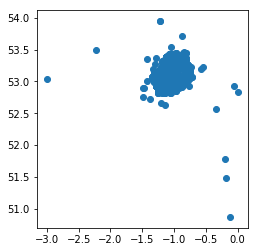

In [42]:
#We can crudely plot the points
gdf.plot();

Hmmm... it looks like there may be some outliers... We'll worry about those later....

## Plotting Boundaries

If we poke around the police data website, we also see an area that has boundaries...

https://data.police.uk/data/boundaries/

Let's have a rummage around inside them...

### Force Boundaries

In [9]:
!wget https://data.police.uk/data/boundaries/force_kmls.zip

--2019-03-06 19:53:58--  https://data.police.uk/data/boundaries/force_kmls.zip
Resolving data.police.uk (data.police.uk)... 52.208.73.184, 34.248.72.191
Connecting to data.police.uk (data.police.uk)|52.208.73.184|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://policeuk-data.s3.amazonaws.com/kmls/force_kmls.zip [following]
--2019-03-06 19:53:58--  https://policeuk-data.s3.amazonaws.com/kmls/force_kmls.zip
Resolving policeuk-data.s3.amazonaws.com (policeuk-data.s3.amazonaws.com)... 52.218.37.210
Connecting to policeuk-data.s3.amazonaws.com (policeuk-data.s3.amazonaws.com)|52.218.37.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6093291 (5.8M) [application/zip]
Saving to: ‘force_kmls.zip’

force_kmls.zip      100%[===================>]   5.81M  6.95MB/s    in 0.8s    

2019-03-06 19:54:00 (6.95 MB/s) - ‘force_kmls.zip’ saved [6093291/6093291]



In [10]:
#Unzip the file...
!unzip force_kmls.zip

Archive:  force_kmls.zip
  inflating: force kmls/avon-and-somerset.kml  
  inflating: force kmls/bedfordshire.kml  
  inflating: force kmls/cambridgeshire.kml  
  inflating: force kmls/cheshire.kml  
  inflating: force kmls/city-of-london.kml  
  inflating: force kmls/cleveland.kml  
  inflating: force kmls/cumbria.kml  
  inflating: force kmls/derbyshire.kml  
  inflating: force kmls/devon-and-cornwall.kml  
  inflating: force kmls/dorset.kml   
  inflating: force kmls/durham.kml   
  inflating: force kmls/dyfed-powys.kml  
  inflating: force kmls/essex.kml    
  inflating: force kmls/gloucestershire.kml  
  inflating: force kmls/greater-manchester.kml  
  inflating: force kmls/gwent.kml    
  inflating: force kmls/hampshire.kml  
  inflating: force kmls/hertfordshire.kml  
  inflating: force kmls/humberside.kml  
  inflating: force kmls/kent.kml     
  inflating: force kmls/lancashire.kml  
  inflating: force kmls/leicestershire.kml  
  inflating: force kmls/lincolnshire.kml  
  infl

The forces boundaries file has boundaries for different police forces, in the form of `.kml` files. A `.kml` file is a *Keyhole Markup File*, a geogrpahical file type used widely in Google Maps and Google Earth.

The KML file format can include all sorts of monstrosities which means that, by default, geopandas support for reading it directly is disabled by default.

*(The most general workaround for working with KML is to use the `ogr2ogr` tool to convert the KML to a shapefile format, and then read that in to geopandas. We could also look elsewhere for better data managed [police authority shapefiles](http://geoportal.statistics.gov.uk/datasets/3e5a096a8c7c456fb6d3164a3f44b005_0).)*


However, the police boundaries KML is quite well-behaved so we *can* load it into a geopandas dataframe directly if we enable KML support.

In [16]:
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw'
fiona.drvsupport.supported_drivers['KML'] = 'rw'

Let's grab the file for Nottinghamshire and preview it.

In [18]:
gpd_notts = gpd.read_file('force kmls/nottinghamshire.kml')
gpd_notts.head()

,Name,Description,geometry
0,,,"(POLYGON Z ((-1.22519698716 53.1792449968 0, -..."


In [ ]:
#get hold of the shapefile
notts_shp = gpd_notts['geometry'].iloc[0]
notts_shp

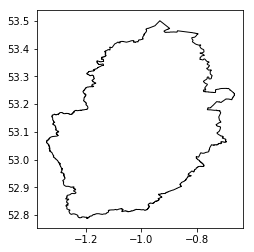

In [45]:
ax = gpd_notts.plot(color='white', edgecolor='black')

Let's see how the data fits into that.

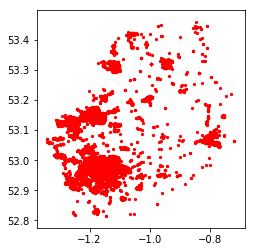

In [142]:
#This step may take some time to run as we check whether each point lies within the boundary
#We then filter the dataframe to retain only the points inside the boundary
gdf_notts = gdf[ gdf.intersects(gpd_notts['geometry'].iloc[0]) ]
gdf_notts.plot( marker='o', color='red', markersize=5);

With a little bit of jiggery pokery, we can overplot the crime locations on the boundary.

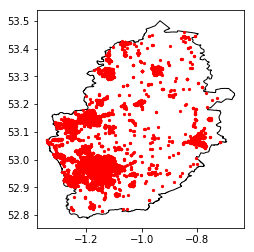

In [143]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = gpd_notts.plot(color='white', edgecolor='black', ax=ax)
ax = gdf_notts.plot( marker='o', color='red', markersize=5, ax=ax)

### Neighbourhoods Data
The police data also has shapefiles for neighbourhoods. Let's try to grab that.

In [51]:
!wget https://data.police.uk/data/boundaries/2018-12.zip

--2019-03-06 20:29:57--  https://data.police.uk/data/boundaries/2018-12.zip
Resolving data.police.uk (data.police.uk)... 34.248.72.191, 52.208.73.184
Connecting to data.police.uk (data.police.uk)|34.248.72.191|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://policeuk-data.s3.amazonaws.com/kmls/2018-12.zip [following]
--2019-03-06 20:29:58--  https://policeuk-data.s3.amazonaws.com/kmls/2018-12.zip
Resolving policeuk-data.s3.amazonaws.com (policeuk-data.s3.amazonaws.com)... 52.218.36.25
Connecting to policeuk-data.s3.amazonaws.com (policeuk-data.s3.amazonaws.com)|52.218.36.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35113386 (33M) [application/zip]
Saving to: ‘2018-12.zip’

2018-12.zip         100%[===================>]  33.49M  18.8MB/s    in 1.8s    

2019-03-06 20:30:00 (18.8 MB/s) - ‘2018-12.zip’ saved [35113386/35113386]



In [52]:
!unzip 2018-12.zip

Archive:  2018-12.zip
   creating: 2018-12/city-of-london/
  inflating: 2018-12/city-of-london/cp.kml  
   creating: 2018-12/northern-ireland/
  inflating: 2018-12/northern-ireland/Strand Road.kml  
  inflating: 2018-12/northern-ireland/Downpatrick.kml  
  inflating: 2018-12/northern-ireland/Larne.kml  
  inflating: 2018-12/northern-ireland/Limavady.kml  
  inflating: 2018-12/northern-ireland/Lisburn Road.kml  
  inflating: 2018-12/northern-ireland/Woodbourne.kml  
  inflating: 2018-12/northern-ireland/Newtownards.kml  
  inflating: 2018-12/northern-ireland/Lisnaskea.kml  
  inflating: 2018-12/northern-ireland/Newry.kml  
  inflating: 2018-12/northern-ireland/Armagh.kml  
  inflating: 2018-12/northern-ireland/Magherafelt.kml  
  inflating: 2018-12/northern-ireland/Enniskillen.kml  
  inflating: 2018-12/northern-ireland/Newtownabbey.kml  
  inflating: 2018-12/northern-ireland/Antrim.kml  
  inflating: 2018-12/northern-ireland/Crossmaglen.kml  
  inflating: 2018-12/northern-ireland/Strab

  inflating: 2018-12/north-wales/FSW03.kml  
  inflating: 2018-12/north-wales/FSW14.kml  
  inflating: 2018-12/north-wales/DCW04.kml  
  inflating: 2018-12/north-wales/WCW02.kml  
  inflating: 2018-12/north-wales/GNW11.kml  
  inflating: 2018-12/north-wales/WRW15.kml  
  inflating: 2018-12/north-wales/YMW36.kml  
  inflating: 2018-12/north-wales/FSW07.kml  
  inflating: 2018-12/north-wales/DCW06.kml  
  inflating: 2018-12/north-wales/GNW07.kml  
  inflating: 2018-12/north-wales/GSW34.kml  
  inflating: 2018-12/north-wales/FSW22.kml  
  inflating: 2018-12/north-wales/DCW01.kml  
  inflating: 2018-12/north-wales/WXW05.kml  
  inflating: 2018-12/north-wales/YMW14.kml  
  inflating: 2018-12/north-wales/GSW09.kml  
  inflating: 2018-12/north-wales/CRW10.kml  
  inflating: 2018-12/north-wales/DCW14.kml  
  inflating: 2018-12/north-wales/WRW07.kml  
  inflating: 2018-12/north-wales/WCW16.kml  
  inflating: 2018-12/north-wales/FSW09.kml  
  inflating: 2018-12/north-wales/YMW11.kml  
  inflatin

  inflating: 2018-12/warwickshire/whit.kml  
  inflating: 2018-12/warwickshire/an.kml  
  inflating: 2018-12/warwickshire/nw.kml  
  inflating: 2018-12/warwickshire/ship.kml  
  inflating: 2018-12/warwickshire/rtw.kml  
  inflating: 2018-12/warwickshire/st.kml  
  inflating: 2018-12/warwickshire/lss.kml  
  inflating: 2018-12/warwickshire/be.kml  
  inflating: 2018-12/warwickshire/nwn.kml  
  inflating: 2018-12/warwickshire/rtc.kml  
  inflating: 2018-12/warwickshire/rte.kml  
  inflating: 2018-12/warwickshire/nc.kml  
  inflating: 2018-12/warwickshire/nws.kml  
  inflating: 2018-12/warwickshire/rrn.kml  
  inflating: 2018-12/warwickshire/bw.kml  
  inflating: 2018-12/warwickshire/sou.kml  
  inflating: 2018-12/warwickshire/rtn.kml  
  inflating: 2018-12/warwickshire/ns.kml  
  inflating: 2018-12/warwickshire/wrw.kml  
  inflating: 2018-12/warwickshire/nww.kml  
  inflating: 2018-12/warwickshire/nwe.kml  
   creating: 2018-12/hampshire/
  inflating: 2018-12/hampshire/11TA03.kml  
  inf

  inflating: 2018-12/gwent/MM82.kml  
  inflating: 2018-12/gwent/GA83.kml  
  inflating: 2018-12/gwent/TP88.kml  
  inflating: 2018-12/gwent/CC85.kml  
  inflating: 2018-12/gwent/TC88.kml  
  inflating: 2018-12/gwent/CC83.kml  
  inflating: 2018-12/gwent/GE81.kml  
  inflating: 2018-12/gwent/TC83.kml  
  inflating: 2018-12/gwent/MC85.kml  
  inflating: 2018-12/gwent/NL83.kml  
  inflating: 2018-12/gwent/NM82.kml  
  inflating: 2018-12/gwent/GA82.kml  
  inflating: 2018-12/gwent/CG81.kml  
  inflating: 2018-12/gwent/CH83.kml  
  inflating: 2018-12/gwent/MC84.kml  
  inflating: 2018-12/gwent/CC86.kml  
  inflating: 2018-12/gwent/MC81.kml  
  inflating: 2018-12/gwent/CR81.kml  
  inflating: 2018-12/gwent/GE85.kml  
  inflating: 2018-12/gwent/GE86.kml  
  inflating: 2018-12/gwent/GA81.kml  
  inflating: 2018-12/gwent/GB83.kml  
  inflating: 2018-12/gwent/TC89.kml  
  inflating: 2018-12/gwent/TP81.kml  
  inflating: 2018-12/gwent/MM85.kml  
  inflating: 2018-12/gwent/NA86.kml  
  inflating:

  inflating: 2018-12/west-midlands/BE13.kml  
  inflating: 2018-12/west-midlands/BE01.kml  
  inflating: 2018-12/west-midlands/SH07.kml  
  inflating: 2018-12/west-midlands/BE04.kml  
  inflating: 2018-12/west-midlands/DY03.kml  
  inflating: 2018-12/west-midlands/WS05.kml  
  inflating: 2018-12/west-midlands/SH08.kml  
  inflating: 2018-12/west-midlands/SW04.kml  
  inflating: 2018-12/west-midlands/WV06.kml  
  inflating: 2018-12/west-midlands/SH09.kml  
  inflating: 2018-12/west-midlands/CV04.kml  
  inflating: 2018-12/west-midlands/BW20.kml  
  inflating: 2018-12/west-midlands/BE11.kml  
  inflating: 2018-12/west-midlands/BW01.kml  
  inflating: 2018-12/west-midlands/CV01.kml  
  inflating: 2018-12/west-midlands/SW03.kml  
  inflating: 2018-12/west-midlands/WS04.kml  
  inflating: 2018-12/west-midlands/SH10.kml  
  inflating: 2018-12/west-midlands/DY01.kml  
  inflating: 2018-12/west-midlands/BW21.kml  
  inflating: 2018-12/west-midlands/DY04.kml  
  inflating: 2018-12/west-midlands

  inflating: 2018-12/metropolitan/E05000112.kml  
  inflating: 2018-12/metropolitan/E05000286.kml  
  inflating: 2018-12/metropolitan/E05000176.kml  
  inflating: 2018-12/metropolitan/E05000333.kml  
  inflating: 2018-12/metropolitan/E05000404.kml  
  inflating: 2018-12/metropolitan/E05000300.kml  
  inflating: 2018-12/metropolitan/E05000226.kml  
  inflating: 2018-12/metropolitan/E05000620.kml  
  inflating: 2018-12/metropolitan/E05000143.kml  
  inflating: 2018-12/metropolitan/E05000602.kml  
  inflating: 2018-12/metropolitan/E05000349.kml  
  inflating: 2018-12/metropolitan/E05000057.kml  
  inflating: 2018-12/metropolitan/E05000307.kml  
  inflating: 2018-12/metropolitan/E05000415.kml  
  inflating: 2018-12/metropolitan/E05000418.kml  
  inflating: 2018-12/metropolitan/E05000461.kml  
  inflating: 2018-12/metropolitan/E05000186.kml  
  inflating: 2018-12/metropolitan/00ADGR.kml  
  inflating: 2018-12/metropolitan/00AHGS.kml  
  inflating: 2018-12/metropolitan/00BK22N.kml  
  inflat

  inflating: 2018-12/metropolitan/E05000357.kml  
  inflating: 2018-12/metropolitan/00BEGH.kml  
  inflating: 2018-12/metropolitan/00BCGS.kml  
  inflating: 2018-12/metropolitan/E05000291.kml  
  inflating: 2018-12/metropolitan/E05009320.kml  
  inflating: 2018-12/metropolitan/E05000279.kml  
  inflating: 2018-12/metropolitan/E05000362.kml  
  inflating: 2018-12/metropolitan/E05000060.kml  
  inflating: 2018-12/metropolitan/E05000472.kml  
  inflating: 2018-12/metropolitan/E05000624.kml  
  inflating: 2018-12/metropolitan/00BK05N.kml  
  inflating: 2018-12/metropolitan/00AHGU.kml  
  inflating: 2018-12/metropolitan/E05000457.kml  
  inflating: 2018-12/metropolitan/E05000450.kml  
  inflating: 2018-12/metropolitan/E05009377.kml  
  inflating: 2018-12/metropolitan/00BK09N.kml  
  inflating: 2018-12/metropolitan/00AQ01T.kml  
  inflating: 2018-12/metropolitan/E05009384.kml  
  inflating: 2018-12/metropolitan/E05000105.kml  
  inflating: 2018-12/metropolitan/E05000268.kml  
  inflating: 20

  inflating: 2018-12/leicestershire/NR30.kml  
  inflating: 2018-12/leicestershire/NS51.kml  
  inflating: 2018-12/leicestershire/NR41.kml  
  inflating: 2018-12/leicestershire/NC67.kml  
  inflating: 2018-12/leicestershire/NW08.kml  
  inflating: 2018-12/leicestershire/NN48.kml  
  inflating: 2018-12/leicestershire/NL59.kml  
   creating: 2018-12/staffordshire/
  inflating: 2018-12/staffordshire/FR60.kml  
  inflating: 2018-12/staffordshire/IA10.kml  
  inflating: 2018-12/staffordshire/IB60.kml  
  inflating: 2018-12/staffordshire/FP70.kml  
  inflating: 2018-12/staffordshire/FM30.kml  
  inflating: 2018-12/staffordshire/IE50.kml  
  inflating: 2018-12/staffordshire/FR80.kml  
  inflating: 2018-12/staffordshire/FV60.kml  
  inflating: 2018-12/staffordshire/IC30.kml  
  inflating: 2018-12/staffordshire/IC10.kml  
  inflating: 2018-12/staffordshire/FX50.kml  
  inflating: 2018-12/staffordshire/IA00.kml  
  inflating: 2018-12/staffordshire/IE90.kml  
  inflating: 2018-12/staffordshire/FW

  inflating: 2018-12/devon-and-cornwall/DEV.4070.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4002.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4089.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4064.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4110.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4106.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4068.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4028.kml  
  inflating: 2018-12/devon-and-cornwall/PLY.4039.kml  
  inflating: 2018-12/devon-and-cornwall/DEV.4028.kml  
  inflating: 2018-12/devon-and-cornwall/PLY.4034.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4040.kml  
  inflating: 2018-12/devon-and-cornwall/PLY.4038.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4008.kml  
  inflating: 2018-12/devon-and-cornwall/PLY.4026.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4026.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4021.kml  
  inflating: 2018-12/devon-and-cornwall/CIOS.4031.kml  
  i

  inflating: 2018-12/lancashire/D11.kml  
  inflating: 2018-12/lancashire/A13.kml  
  inflating: 2018-12/lancashire/D20.kml  
  inflating: 2018-12/lancashire/D16.kml  
  inflating: 2018-12/lancashire/B37.kml  
  inflating: 2018-12/lancashire/B21.kml  
  inflating: 2018-12/lancashire/D8.kml  
  inflating: 2018-12/lancashire/C24.kml  
  inflating: 2018-12/lancashire/D10.kml  
  inflating: 2018-12/lancashire/B7.kml  
  inflating: 2018-12/lancashire/F16.kml  
  inflating: 2018-12/lancashire/E5.kml  
  inflating: 2018-12/lancashire/F3.kml  
  inflating: 2018-12/lancashire/F25.kml  
  inflating: 2018-12/lancashire/A34.kml  
  inflating: 2018-12/lancashire/F17.kml  
  inflating: 2018-12/lancashire/F41.kml  
  inflating: 2018-12/lancashire/A3.kml  
  inflating: 2018-12/lancashire/B13.kml  
  inflating: 2018-12/lancashire/E19.kml  
  inflating: 2018-12/lancashire/F36.kml  
  inflating: 2018-12/lancashire/A4.kml  
  inflating: 2018-12/lancashire/E17.kml  
  inflating: 2018-12/lancashire/B20.kml 

  inflating: 2018-12/south-wales/W05000566.kml  
  inflating: 2018-12/south-wales/W05000964.kml  
  inflating: 2018-12/south-wales/W05000709.kml  
  inflating: 2018-12/south-wales/W05000645.kml  
  inflating: 2018-12/south-wales/Rhondda-Cynon-Taf.kml  
  inflating: 2018-12/south-wales/W05000559.kml  
  inflating: 2018-12/south-wales/W05000858.kml  
  inflating: 2018-12/south-wales/W05000616.kml  
  inflating: 2018-12/south-wales/W05000635.kml  
  inflating: 2018-12/south-wales/W05000596.kml  
  inflating: 2018-12/south-wales/W05000546.kml  
  inflating: 2018-12/south-wales/W05000623.kml  
  inflating: 2018-12/south-wales/W05000593.kml  
  inflating: 2018-12/south-wales/W05000695.kml  
  inflating: 2018-12/south-wales/W05000594.kml  
  inflating: 2018-12/south-wales/W05000649.kml  
  inflating: 2018-12/south-wales/W05000972.kml  
  inflating: 2018-12/south-wales/W05000899.kml  
  inflating: 2018-12/south-wales/Neath-Port-Talbot.kml  
  inflating: 2018-12/south-wales/W05000533.kml  
  in

  inflating: 2018-12/northumbria/F4.kml  
  inflating: 2018-12/northumbria/E7.kml  
  inflating: 2018-12/northumbria/B1.kml  
  inflating: 2018-12/northumbria/D2.kml  
  inflating: 2018-12/northumbria/E1.kml  
  inflating: 2018-12/northumbria/E6.kml  
  inflating: 2018-12/northumbria/D4.kml  
  inflating: 2018-12/northumbria/E8.kml  
  inflating: 2018-12/northumbria/F9.kml  
  inflating: 2018-12/northumbria/F7.kml  
  inflating: 2018-12/northumbria/F2.kml  
  inflating: 2018-12/northumbria/C2.kml  
  inflating: 2018-12/northumbria/F5.kml  
  inflating: 2018-12/northumbria/F1.kml  
  inflating: 2018-12/northumbria/C1.kml  
  inflating: 2018-12/northumbria/C6.kml  
  inflating: 2018-12/northumbria/E4.kml  
  inflating: 2018-12/northumbria/E2.kml  
  inflating: 2018-12/northumbria/F6.kml  
  inflating: 2018-12/northumbria/B2.kml  
  inflating: 2018-12/northumbria/A7.kml  
  inflating: 2018-12/northumbria/E5.kml  
  inflating: 2018-12/northumbria/F3.kml  
  inflating: 2018-12/northumbria/A

  inflating: 2018-12/hertfordshire/A01.kml  
  inflating: 2018-12/hertfordshire/G04.kml  
  inflating: 2018-12/hertfordshire/D03.kml  
  inflating: 2018-12/hertfordshire/C01.kml  
  inflating: 2018-12/hertfordshire/C04.kml  
   creating: 2018-12/bedfordshire/
  inflating: 2018-12/bedfordshire/67.kml  
  inflating: 2018-12/bedfordshire/33.kml  
  inflating: 2018-12/bedfordshire/20.kml  
  inflating: 2018-12/bedfordshire/50.kml  
  inflating: 2018-12/bedfordshire/66.kml  
  inflating: 2018-12/bedfordshire/35.kml  
  inflating: 2018-12/bedfordshire/10.kml  
  inflating: 2018-12/bedfordshire/11.kml  
  inflating: 2018-12/bedfordshire/58.kml  
  inflating: 2018-12/bedfordshire/54.kml  
  inflating: 2018-12/bedfordshire/17.kml  
  inflating: 2018-12/bedfordshire/70.kml  
  inflating: 2018-12/bedfordshire/28.kml  
  inflating: 2018-12/bedfordshire/18.kml  
  inflating: 2018-12/bedfordshire/41.kml  
  inflating: 2018-12/bedfordshire/13.kml  
  inflating: 2018-12/bedfordshire/14.kml  
  inflati

  inflating: 2018-12/dorset/10-21.kml  
  inflating: 2018-12/dorset/10-1.kml  
  inflating: 2018-12/dorset/10-72.kml  
  inflating: 2018-12/dorset/10-68.kml  
  inflating: 2018-12/dorset/10-70.kml  
  inflating: 2018-12/dorset/10-22.kml  
  inflating: 2018-12/dorset/10-13.kml  
  inflating: 2018-12/dorset/10-31.kml  
  inflating: 2018-12/dorset/10-5.kml  
  inflating: 2018-12/dorset/10-15.kml  
  inflating: 2018-12/dorset/10-43.kml  
  inflating: 2018-12/dorset/10-12.kml  
  inflating: 2018-12/dorset/10-76.kml  
  inflating: 2018-12/dorset/10-67.kml  
  inflating: 2018-12/dorset/10-49.kml  
  inflating: 2018-12/dorset/10-7.kml  
  inflating: 2018-12/dorset/10-16.kml  
  inflating: 2018-12/dorset/10-65.kml  
  inflating: 2018-12/dorset/10-34.kml  
  inflating: 2018-12/dorset/10-46.kml  
  inflating: 2018-12/dorset/10-60.kml  
  inflating: 2018-12/dorset/10-59.kml  
  inflating: 2018-12/dorset/10-6.kml  
  inflating: 2018-12/dorset/10-48.kml  
  inflating: 2018-12/dorset/10-51.kml  
  in

  inflating: 2018-12/kent/85.kml     
  inflating: 2018-12/kent/152.kml    
  inflating: 2018-12/kent/185.kml    
  inflating: 2018-12/kent/205.kml    
  inflating: 2018-12/kent/98.kml     
  inflating: 2018-12/kent/74.kml     
  inflating: 2018-12/kent/47.kml     
  inflating: 2018-12/kent/89.kml     
  inflating: 2018-12/kent/106.kml    
  inflating: 2018-12/kent/40703.kml  
  inflating: 2018-12/kent/153.kml    
  inflating: 2018-12/kent/165.kml    
  inflating: 2018-12/kent/231.kml    
  inflating: 2018-12/kent/187.kml    
  inflating: 2018-12/kent/253.kml    
  inflating: 2018-12/kent/179.kml    
  inflating: 2018-12/kent/4.kml      
  inflating: 2018-12/kent/174.kml    
  inflating: 2018-12/kent/52.kml     
  inflating: 2018-12/kent/219.kml    
  inflating: 2018-12/kent/170.kml    
  inflating: 2018-12/kent/255.kml    
  inflating: 2018-12/kent/40.kml     
  inflating: 2018-12/kent/172.kml    
  inflating: 2018-12/kent/368390.kml  
  inflating: 2018-12/kent/121.kml    
  inflating

  inflating: 2018-12/essex/145.kml   
  inflating: 2018-12/essex/7.kml     
  inflating: 2018-12/essex/125.kml   
  inflating: 2018-12/essex/101.kml   
  inflating: 2018-12/essex/79.kml    
  inflating: 2018-12/essex/27.kml    
  inflating: 2018-12/essex/99.kml    
  inflating: 2018-12/essex/122.kml   
  inflating: 2018-12/essex/43.kml    
  inflating: 2018-12/essex/57.kml    
  inflating: 2018-12/essex/46.kml    
  inflating: 2018-12/essex/31.kml    
  inflating: 2018-12/essex/56.kml    
  inflating: 2018-12/essex/110.kml   
  inflating: 2018-12/essex/51.kml    
  inflating: 2018-12/essex/62.kml    
  inflating: 2018-12/essex/61.kml    
  inflating: 2018-12/essex/23.kml    
  inflating: 2018-12/essex/55.kml    
  inflating: 2018-12/essex/87.kml    
  inflating: 2018-12/essex/48.kml    
  inflating: 2018-12/essex/44.kml    
  inflating: 2018-12/essex/34.kml    
  inflating: 2018-12/essex/127.kml   
  inflating: 2018-12/essex/78.kml    
  inflating: 2018-12/essex/119.kml   
  inflating:

  inflating: 2018-12/derbyshire/NR13.kml  
  inflating: 2018-12/derbyshire/NH08.kml  
  inflating: 2018-12/derbyshire/NE16.kml  
  inflating: 2018-12/derbyshire/ND09.kml  
  inflating: 2018-12/derbyshire/ND05.kml  
  inflating: 2018-12/derbyshire/NR06.kml  
  inflating: 2018-12/derbyshire/ND12.kml  
  inflating: 2018-12/derbyshire/NR09.kml  
  inflating: 2018-12/derbyshire/NT05.kml  
  inflating: 2018-12/derbyshire/NR10.kml  
  inflating: 2018-12/derbyshire/SW04.kml  
  inflating: 2018-12/derbyshire/NT09.kml  
  inflating: 2018-12/derbyshire/SS04.kml  
  inflating: 2018-12/derbyshire/SK03.kml  
  inflating: 2018-12/derbyshire/NR08.kml  
  inflating: 2018-12/derbyshire/NE06.kml  
  inflating: 2018-12/derbyshire/NR02.kml  
  inflating: 2018-12/derbyshire/NT03.kml  
  inflating: 2018-12/derbyshire/NE13.kml  
  inflating: 2018-12/derbyshire/NH01.kml  
  inflating: 2018-12/derbyshire/NE02.kml  
  inflating: 2018-12/derbyshire/NT08.kml  
  inflating: 2018-12/derbyshire/SW03.kml  
  inflating

  inflating: 2018-12/avon-and-somerset/CN206.kml  
  inflating: 2018-12/avon-and-somerset/AE016.kml  
  inflating: 2018-12/avon-and-somerset/AW051.kml  
  inflating: 2018-12/avon-and-somerset/BN152.kml  
  inflating: 2018-12/avon-and-somerset/BS143.kml  
  inflating: 2018-12/avon-and-somerset/AW042.kml  
  inflating: 2018-12/avon-and-somerset/BE163.kml  
  inflating: 2018-12/avon-and-somerset/BS107.kml  
  inflating: 2018-12/avon-and-somerset/AW039.kml  
  inflating: 2018-12/avon-and-somerset/CN205.kml  
  inflating: 2018-12/avon-and-somerset/BN195.kml  
  inflating: 2018-12/avon-and-somerset/BE182.kml  
  inflating: 2018-12/avon-and-somerset/CS222.kml  
  inflating: 2018-12/avon-and-somerset/AE028.kml  
  inflating: 2018-12/avon-and-somerset/CS221.kml  
  inflating: 2018-12/avon-and-somerset/AN012.kml  
  inflating: 2018-12/avon-and-somerset/AW040.kml  
  inflating: 2018-12/avon-and-somerset/AW049.kml  
  inflating: 2018-12/avon-and-somerset/BE194.kml  
  inflating: 2018-12/avon-and-s

This opens to quite a lot of KML files...

Let's have a look at one of them...

In [53]:
!ls 2018-12/nottinghamshire/

31-10.kml  31-19.kml  31-27.kml  31-35.kml  31-43.kml  31-51.kml  31-7.kml
31-11.kml  31-1.kml   31-28.kml  31-36.kml  31-44.kml  31-52.kml  31-8.kml
31-12.kml  31-20.kml  31-29.kml  31-37.kml  31-45.kml  31-53.kml  31-9.kml
31-13.kml  31-21.kml  31-2.kml	 31-38.kml  31-46.kml  31-54.kml
31-14.kml  31-22.kml  31-30.kml  31-39.kml  31-47.kml  31-55.kml
31-15.kml  31-23.kml  31-31.kml  31-3.kml   31-48.kml  31-56.kml
31-16.kml  31-24.kml  31-32.kml  31-40.kml  31-49.kml  31-57.kml
31-17.kml  31-25.kml  31-33.kml  31-41.kml  31-4.kml   31-5.kml
31-18.kml  31-26.kml  31-34.kml  31-42.kml  31-50.kml  31-6.kml


In [55]:
test_neighbourhood = gpd.read_file('2018-12/nottinghamshire/31-10.kml')
test_neighbourhood

,Name,Description,geometry
0,,,"POLYGON Z ((-0.997462 53.395232 0, -1.010676 5..."


This is a bit rubbish, and we can find more descriptibe boundary files elsewhere (eg http://geoportal.statistics.gov.uk/datasets/da831f80764346889837c72508f046fa_0 ) but let's sticl with it for now.

We can automate reading all the files into a single, merged geodataframe:

In [58]:
import os

#Preview the first few items in a list of all the nottinghamshire files
os.listdir('2018-12/nottinghamshire/')[:3]

['31-24.kml', '31-1.kml', '31-19.kml']

In [64]:
#Automate the loading of the data into a single dataframe
#https://gis.stackexchange.com/a/162661/119781

notts_neighbourhoods = gpd.GeoDataFrame()
for f in os.listdir('2018-12/nottinghamshire/'):
    neighbourhood = gpd.read_file('2018-12/nottinghamshire/{}'.format(f))
    notts_neighbourhoods =  gpd.GeoDataFrame( pd.concat( [notts_neighbourhoods, neighbourhood], ignore_index=True) )
    
notts_neighbourhoods.head()

,Name,Description,geometry
0,,,"POLYGON Z ((-1.23969605662 52.8922711169 0, -1..."
1,,,"POLYGON Z ((-1.31076948916 53.1101026725 0, -1..."
2,,,"POLYGON Z ((-1.11104402914 53.1534102547 0, -1..."
3,,,"POLYGON Z ((-1.18308572625 52.9667621961 0, -1..."
4,,,"POLYGON Z ((-1.17680319939 52.8890113244 0, -1..."


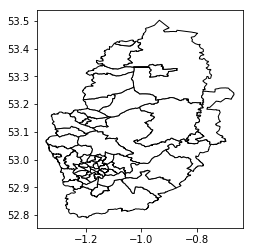

In [66]:
notts_neighbourhoods.plot(color='white', edgecolor='black');

Let's pick one neighbourhood:

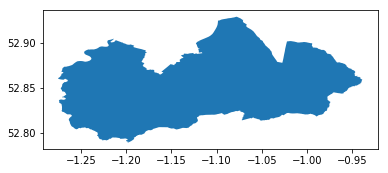

In [74]:
area0 = notts_neighbourhoods.iloc[:1]
area0.plot();

In [144]:
#Get the crimes within that area
gdf_area0 = gdf[ gdf.intersects(area0['geometry'].iloc[0]) ]

And look at the crimes within it:

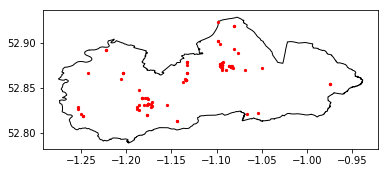

In [145]:
fig, ax = plt.subplots()

ax = area0.plot(color='white', edgecolor='black', ax=ax)
ax = gdf_area0.plot( marker='o', color='red', markersize=5, ax=ax);


The boundary file is quite a useful object because we can also use it to run bounded queries on *other* geographical datasets. For example, we can use the `osmnx` package to pull back road data within the area into the map.

In [77]:
import osmnx as ox

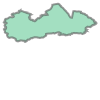

In [81]:
shp = area0['geometry'].iloc[0]
shp

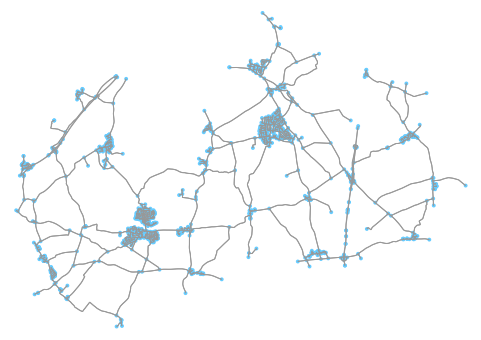

In [136]:
area0_roads = ox.graph_from_polygon(shp, network_type='drive', truncate_by_edge=True,
                                    clean_periphery=False, simplify=True)
fig, ax = ox.plot_graph(area0_roads);

In [133]:
#Not sure how I can get axes to match to overplot roads and data?

In [138]:
#This is broken in Chrome at least
#TM351 students report los of issue with folium / maps in Chrome

#m = ox.plot_graph_folium(area0_roads, popup_attribute='name', edge_width=2, tiles='openstreetmap')
#m

In [122]:
area0.crs = {'init' :'epsg:4326'}
gdf_area0.crs = {'init' :'epsg:4326'}

In [84]:
import folium

In [160]:
m=folium.Map(min_zoom=10, location=[52.9, -0.8])
folium.GeoJson(area0, name='geojson').add_to(m)

#This should work? But the Point geojson from geopandas dataframe is broken somehow?
#I wonder if the points are the wrong way round for this? (lat/lon vs lon/lat)
#folium.GeoJson(gdf_area0, name='geojson').add_to(m)
#The following is borked too
#m = ox.plot_graph_folium(area0_roads, graph_map=m, popup_attribute='name', edge_width=2, tiles='openstreetmap')
m

In [163]:
for i in range(0,len(gdf_area0)):
    loc = gdf_area0.iloc[i]
    folium.Circle([loc['Latitude'], loc['Longitude']],
                  radius=1, color='red',
                  popup='{}<br/><br/>{}<br/><br/>{}'.format(loc['Crime type'], loc['Location'], loc['Last outcome category'])).add_to(m)
m